Визуализация комплексной функции:
$$f(z, \, \phi) = (z^2 - 2.5) (z - 2.5 i) (z + 2.5 i)
\frac {(z - 2 - i)^2} {(z - e^{i \phi})^2 (z - e^{2 i \phi})^2}.$$

Область визуализации:
$$\operatorname {Re} z \in [-3, 3], \quad \operatorname {Im} z \in [-3, 3], \quad \phi \in [0, 2 \pi).$$

In [8]:
display(Video("complex_f.webm", html_attributes="controls loop autoplay"))

Программа ниже создает визуализацию и производит файл видео `complex_f.webm`

# Init

In [1]:
NONE, QT_GUI, JS = range(3)
mode = NONE

In [2]:
if mode == QT_GUI:
    %matplotlib qt
    
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, Video
from matplotlib.colors import hsv_to_rgb

In [3]:
# if not mode == QT_GUI:
#     # %matplotlib inline
#     # %config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
#     plt.ioff()

# use typesetting program LaTeX 
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

# use dark theme
# plt.style.use('dark_background')
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# set dpi
plt.rcParams['figure.dpi'] = 100

if mode == JS:
    plt.rcParams["animation.html"] = "jshtml"

# Визуализация

In [4]:
def z_to_rgb(z):
    """
    Переводит комплексное число $z$ в цвет с форматом `RGB`.
    Применяется для покраски области определения комплексной функции
    соответственно значениям этой функции в этой области.
    """

    # angle in (-pi, pi]
    # H in (0, 1]
    # H = (angle + pi) / 2pi = angle / 2pi + 1 / 2
    H = np.angle(z) / (2 * np.pi) + .5

    r = np.log2(1. + np.abs(z))
    S = (1. + np.abs(np.sin(2. * np.pi * r))) / 2.
    V = (1. + np.abs(np.cos(2. * np.pi * r))) / 2.

    rgb = hsv_to_rgb(np.dstack((H, S, V)))
    
    return rgb

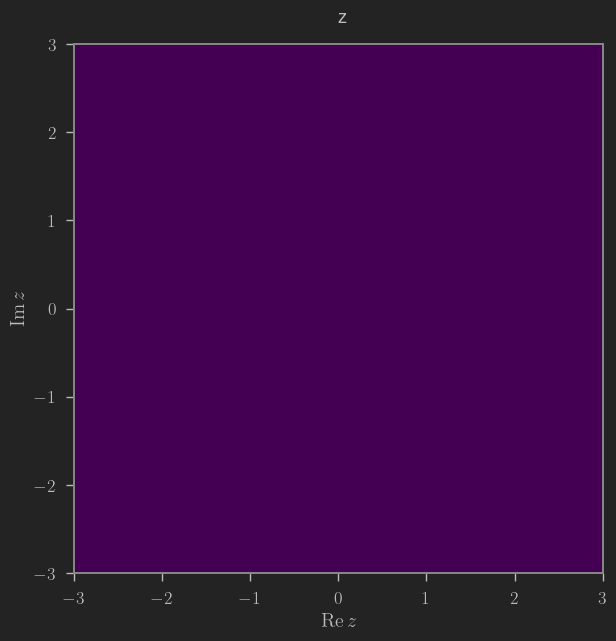

In [5]:
f = lambda z, phi: (
    (z ** 2 - 2.5) * (z - 2.5 * 1j) * (z + 2.5 * 1j)
  * (z - 2 - 1j) ** 2 / ((z - np.exp(1j * phi)) ** 2
  * (z - np.exp(1j * 2 * phi)) ** 2)
)


r = 3
n = 1000
x = np.linspace(-r, r, n)
y = np.linspace(-r, r, n)
X, Y = np.meshgrid(x, y, sparse=True)
z = X + 1j * Y


fig = plt.figure()
ax = plt.subplot(xlabel='$\operatorname {Re} z$', ylabel='$\operatorname {Im} z$')
# ax = plt.subplot(xlabel='$\Re \, \{z\}$', ylabel='$\Im \, \{z\}$')

a = np.zeros(X.shape)
im = plt.imshow(a, origin='lower', extent=[x.min(), x.max(), y.min(), y.max()])
ttl = ax.text(.5, 1.05, 'z', transform = ax.transAxes, va='center')


def init_func():
#     ttl.set_text('')
#     im.set_data(a)
    
    return im, ttl


def func(t):
    data = z_to_rgb(f(z, phi=2 * np.pi * t))
    im.set_data(data)
    ttl.set_text(f"$f(z, \, \phi), \ \phi = 2 \pi \cdot {t:g}$")

    return im, ttl


period = 5  # sec
fps = 60
frames = round(period * fps)
t = np.linspace(0, 1, frames, endpoint=False)


ani = FuncAnimation(
    fig, func, init_func=init_func,
    frames=t, interval=1000 / fps,
#     blit=True
)


if mode == JS:
    display(ani)

In [6]:
import os


# dir `complex_f` is in current directory
path = "./complex_f"

# if dir exists
if os.path.isdir(path):
    # remove all files in dir

    files = os.listdir(path)
    for x in files:
        os.remove(os.path.join(path, x))

else:
    # create dir
    os.mkdir(path)


progress_callback = lambda i, n: print(f"Saving frame {i} of {n}", end=('\n' if i == n - 1 else '\r'))

# write frames
%time ani.save("complex_f/frame.png", writer="imagemagick", progress_callback=progress_callback)


plt.close()

Saving frame 299 of 300
CPU times: user 2min 23s, sys: 17.2 s, total: 2min 40s
Wall time: 3min 19s


In [7]:
# `PATH=/usr/bin:$PATH` -- use `ffmpeg` from `/usr/bin`, prevent the use of `ffmpeg` from a conda/python environment
%time !PATH=/usr/bin:$PATH ffmpeg -y -framerate 60 -i complex_f/frame-%d.png -c:v libvpx-vp9 -b:v 0 -crf 15 complex_f.webm

ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l